In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib.patches as patches

In [2]:
df = pd.read_csv("benchmark_results_fixed_n.csv")

In [3]:
df

,Unnamed: 0,fname1,fname2,nsteps1,nsteps2,alphas1,alphas2,betas1,betas2,levels1,levels2,nnodes_network1,nnodes_network2,nleaves_network1,nleaves_network2,ntransfers_network1,ntransfers_network2,distance,runtime
0,0,network_n100_alpha0.3_beta0.01_0.gr,network_n100_alpha0.3_beta0.01_0.gr,100,100,0.3,0.3,0.01,0.01,24,24,203,203,73,73,29,29,0,0.002406
1,1,network_n100_alpha0.3_beta0.01_0.gr,network_n100_alpha0.3_beta0.01_6.gr,100,100,0.3,0.3,0.01,0.01,24,26,203,203,73,73,29,29,207,0.002741
2,2,network_n100_alpha0.3_beta0.01_0.gr,network_n100_alpha0.3_beta0.01_17.gr,100,100,0.3,0.3,0.01,0.01,24,27,203,203,73,73,29,29,188,0.004170
3,3,network_n100_alpha0.3_beta0.01_0.gr,network_n100_alpha0.3_beta0.01_48.gr,100,100,0.3,0.3,0.01,0.01,24,27,203,203,73,73,29,29,189,0.003138
4,4,network_n100_alpha0.3_beta0.01_0.gr,network_n100_alpha0.3_beta0.01_59.gr,100,100,0.3,0.3,0.01,0.01,24,22,203,203,73,73,29,29,187,0.002941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13651,13651,network_n100_alpha0.7_beta1.25_99.gr,network_n100_alpha0.7_beta1.25_65.gr,100,100,0.7,0.7,1.25,1.25,73,73,203,203,29,29,73,73,239,0.002613
13652,13652,network_n100_alpha0.7_beta1.25_99.gr,network_n100_alpha0.7_beta1.25_76.gr,100,100,0.7,0.7,1.25,1.25,73,73,203,203,29,29,73,73,255,0.002438
13653,13653,network_n100_alpha0.7_beta1.25_99.gr,network_n100_alpha0.7_beta1.25_79.gr,100,100,0.7,0.7,1.25,1.25,73,73,203,203,29,29,73,73,242,0.002472
13654,13654,network_n100_alpha0.7_beta1.25_99.gr,network_n100_alpha0.7_beta1.25_91.gr,100,100,0.7,0.7,1.25,1.25,73,73,203,203,29,29,73,73,233,0.002422


In [4]:
data_per_alpha_beta = {}

In [5]:
for index, row in df.iterrows():
    if row.betas1!=row.betas2:
        continue
    alpha = row.alphas1
    beta = row.betas1
    if np.isnan(row.runtime):
        print("nan indeed")
        continue
    try:
        data_per_alpha_beta[(alpha,beta)].append(row.runtime)
    except KeyError:
        data_per_alpha_beta[(alpha,beta)] = [row.runtime]

In [6]:
import seaborn as sns

In [7]:
alphas = set([])
betas = set([])
for alpha,beta in data_per_alpha_beta.keys():
    alphas.add(alpha)
    betas.add(beta)
    

In [8]:
alphas = sorted(list(alphas))
betas = sorted(list(betas))

In [9]:
import numpy as np

In [10]:
data = np.zeros((len(alphas),len(betas)))

In [11]:
for k,alpha in enumerate(alphas):
    for l,beta in enumerate(betas):
        data[k,l] = np.mean([x for x in data_per_alpha_beta[(alpha,beta)] if not np.isnan(x)])

(np.float64(4.0), np.float64(0.0))


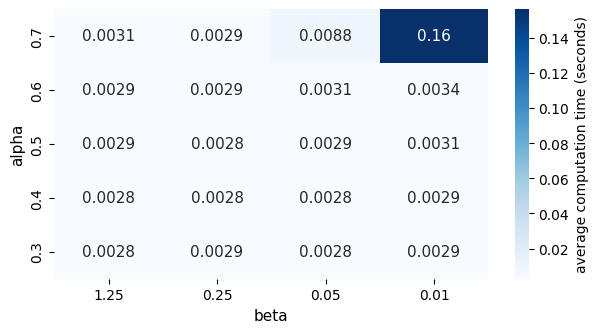

In [34]:
data = pd.DataFrame(data,columns=betas,index=alphas)
#rect = patches.Rectangle((0.01, 0.01), 3.98, 3.98, linewidth=1, edgecolor='r', facecolor='none', angle=0)
fig, ax = plt.subplots(figsize=(7,3.5))
sns.heatmap(data,cmap="Blues",annot=True,annot_kws={"fontsize": 11},cbar_kws={"label":"average computation time (seconds)"})
#plt.gca().add_patch(rect)
plt.xlabel("beta",fontsize=11)
plt.ylabel("alpha",fontsize=11)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
print(plt.gca().get_xlim())
plt.savefig("alpha_beta_fixed_n.pdf",bbox_inches="tight")

In [35]:
data

,0.01,0.05,0.25,1.25
0.3,0.004356,0.004299,0.004240,0.004321
0.4,0.004311,0.004356,0.004454,0.004376
0.5,0.004583,0.004373,0.004416,0.004410
0.6,0.005086,0.004734,0.004458,0.004484
0.7,0.160613,0.011773,0.004654,0.004873


In [14]:
alphas

[0.3, 0.4, 0.5, 0.6, 0.7]

In [15]:
betas

[0.01, 0.05, 0.25, 1.25]

In [16]:
np.mean(data_per_alpha_beta[(0.7,0.01)])

np.float64(0.16061282790572945)

In [17]:
np.mean([x for x in data_per_alpha_beta[(0.7,0.01)] if not np.isnan(x)])

np.float64(0.16061282790572945)

In [18]:
[5**i*0.01 for i in range(4)]

[0.01, 0.05, 0.25, 1.25]

In [19]:
ls

alpha_beta_fixed_n.pdf       level_k_lgt_generator/
benchmark_results.csv        rtime_against_ntaxa.py
benchmark_results_debug.csv  run_distance_computations.py
big_benchmark_backup.csv     scatter_num_transfer_per_edge_rtime.py
fixed_n_alpha_beta.ipynb
